### Gaussian Field

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# Grid
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)
X, Y = np.meshgrid(x, y)
grid_points = np.vstack([X.ravel(), Y.ravel()]).T

# Kernel
length_scale = 1.0
variance = 1.0
kernel = variance * RBF(length_scale=length_scale)

# Generate the Gaussian field
gp = GaussianProcessRegressor(kernel=kernel, random_state=42)
Z = gp.sample_y(grid_points, 1).reshape(X.shape)

In [2]:
# Randomly select 3 points from the previous field
np.random.seed(42)
indices = np.random.choice(len(grid_points), 10, replace=False)
selected_points = grid_points[indices]
selected_values = Z.ravel()[indices]

#print("Selected Points:\n", selected_points)
#print("Selected Values:\n", selected_values)

In [3]:
# Train a Gaussian process with the previous extracted points
gp_small = GaussianProcessRegressor(kernel=kernel, random_state=42)
gp_small.fit(selected_points, selected_values)

# Predict the Gaussian field using the trained Gaussian process
Z_pred, Z_std = gp_small.predict(grid_points, return_std=True)
Z_pred = Z_pred.reshape(X.shape)

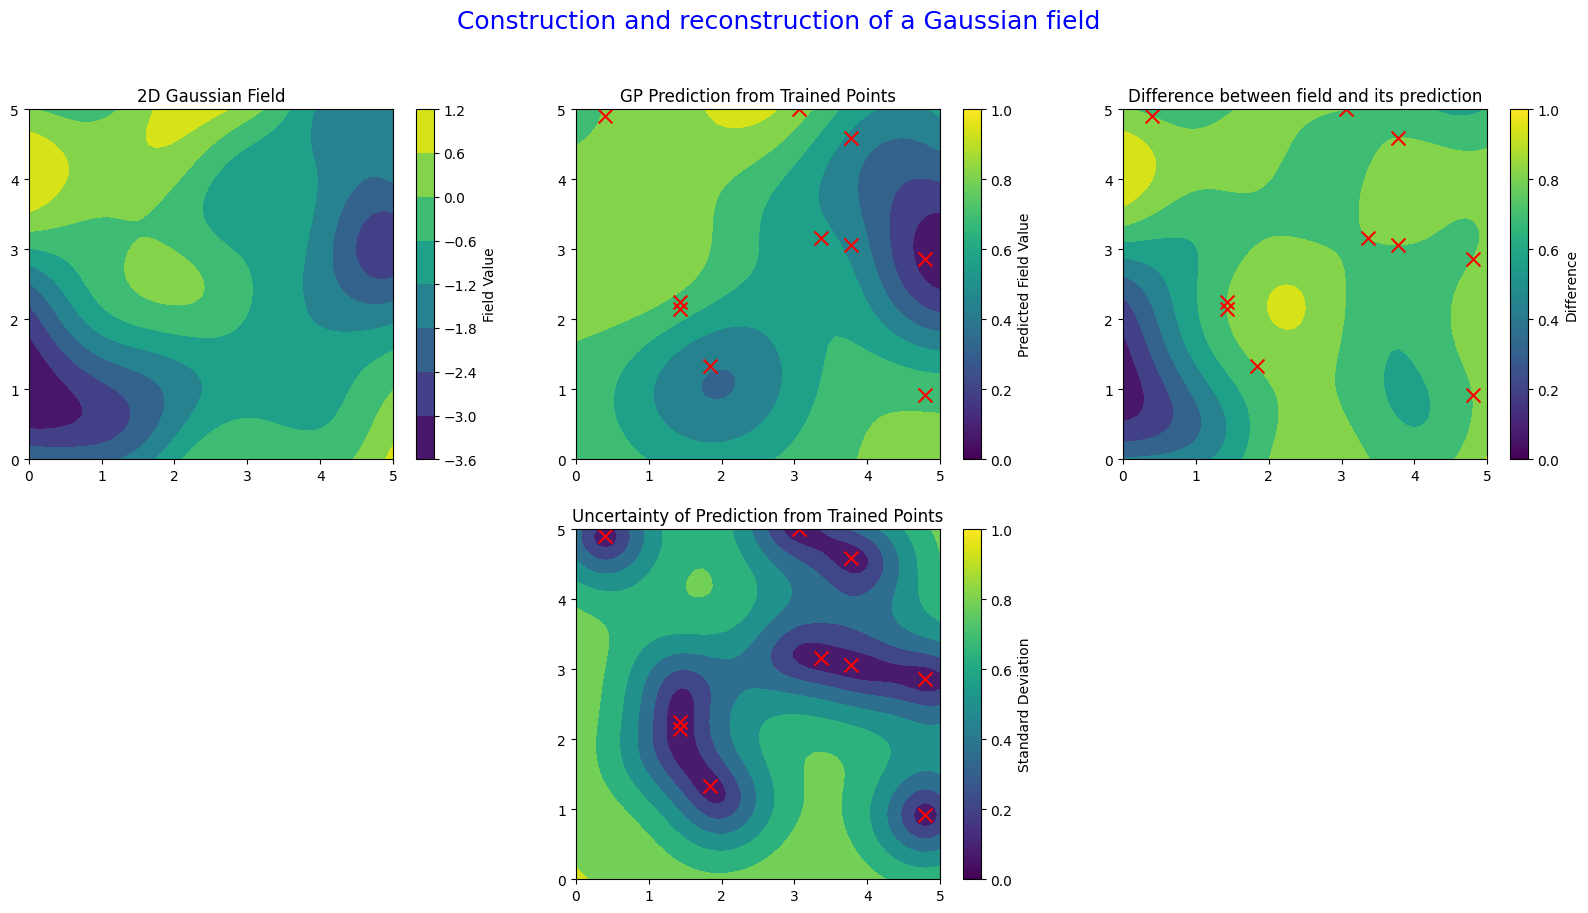

In [6]:
# Plot both original and reconstructed Gaussian fields

plt.figure(figsize=(20, 10))
plt.suptitle(f"Construction and reconstruction of a Gaussian field", fontsize=18, color="blue")

# Original Gaussian field
plt.subplot(2, 3, 1)
plt.contourf(X, Y, Z, cmap='viridis')
plt.title('2D Gaussian Field')
plt.colorbar(label='Field Value')
#plt.clim(-4,4)

# Predicted field
plt.subplot(2, 3, 2)
plt.contourf(X, Y, Z_pred, cmap='viridis')
plt.scatter(selected_points[:, 0], selected_points[:, 1], c='red', marker='x', s=100, label='Selected Points')
plt.title('GP Prediction from Trained Points')
plt.colorbar(label='Predicted Field Value')
#plt.clim(-4,4)

# Standard deviation of predicted field
plt.subplot(2, 3, 5)
plt.contourf(X, Y, Z_std.reshape(X.shape), cmap='viridis')
plt.scatter(selected_points[:, 0], selected_points[:, 1], c='red', marker='x', s=100, label='Selected Points')
plt.title('Uncertainty of Prediction from Trained Points')
plt.colorbar(label='Standard Deviation')

# Difference between original and predicted Gaussian fields
plt.subplot(2, 3, 3)
plt.contourf(X, Y, Z - Z_pred, cmap='viridis')
plt.scatter(selected_points[:, 0], selected_points[:, 1], c='red', marker='x', s=100, label='Selected Points')
plt.title('Difference between field and its prediction')
plt.colorbar(label='Difference')
#plt.clim(-4,4)

plt.show()